# **Principal Component Analysis and prediction of Diabetes**

**Install Pycaret**

In [21]:
!pip install pycaret


**Import Libraries**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


**Dataset**

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

The original dataset can be found on below link:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download





In [24]:
#read cvs file into dataframe
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/diabetes_prediction_dataset.csv')
df.head(500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


gender   age  hypertension  heart_disease smoking_history    bmi  \
0    Female  80.0             0              1           never  25.19   
1    Female  54.0             0              0         No Info  27.32   
2      Male  28.0             0              0           never  27.32   
3    Female  36.0             0              0         current  23.45   
4      Male  76.0             1              1         current  20.14   
..      ...   ...           ...            ...             ...    ...   
495    Male   4.0             0              0         No Info  15.64   
496    Male  70.0             0              0         No Info  27.32   
497  Female  80.0             0              0           never  33.20   
498  Female  62.0             0              0         No Info  27.32   
499    Male  75.0             1              1            ever  31.12   

     HbA1c_level  blood_glucose_level  diabetes  
0            6.6                  140         0  
1            6.6                   80         0  
2            5.7                  158         0  
3            5.0                  155         0  
4            4.8                  155         0  
..           ...                  ...       ...  
495          4.8                  155         0  
496          6.5                  130         0  
497          6.6                  160         0  
498          5.8                   90         0  
499          4.8                  126         0  

[500 rows x 9 columns]

In [25]:
len(df.index)

df['gender'].unique()
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [27]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  3854


In [28]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

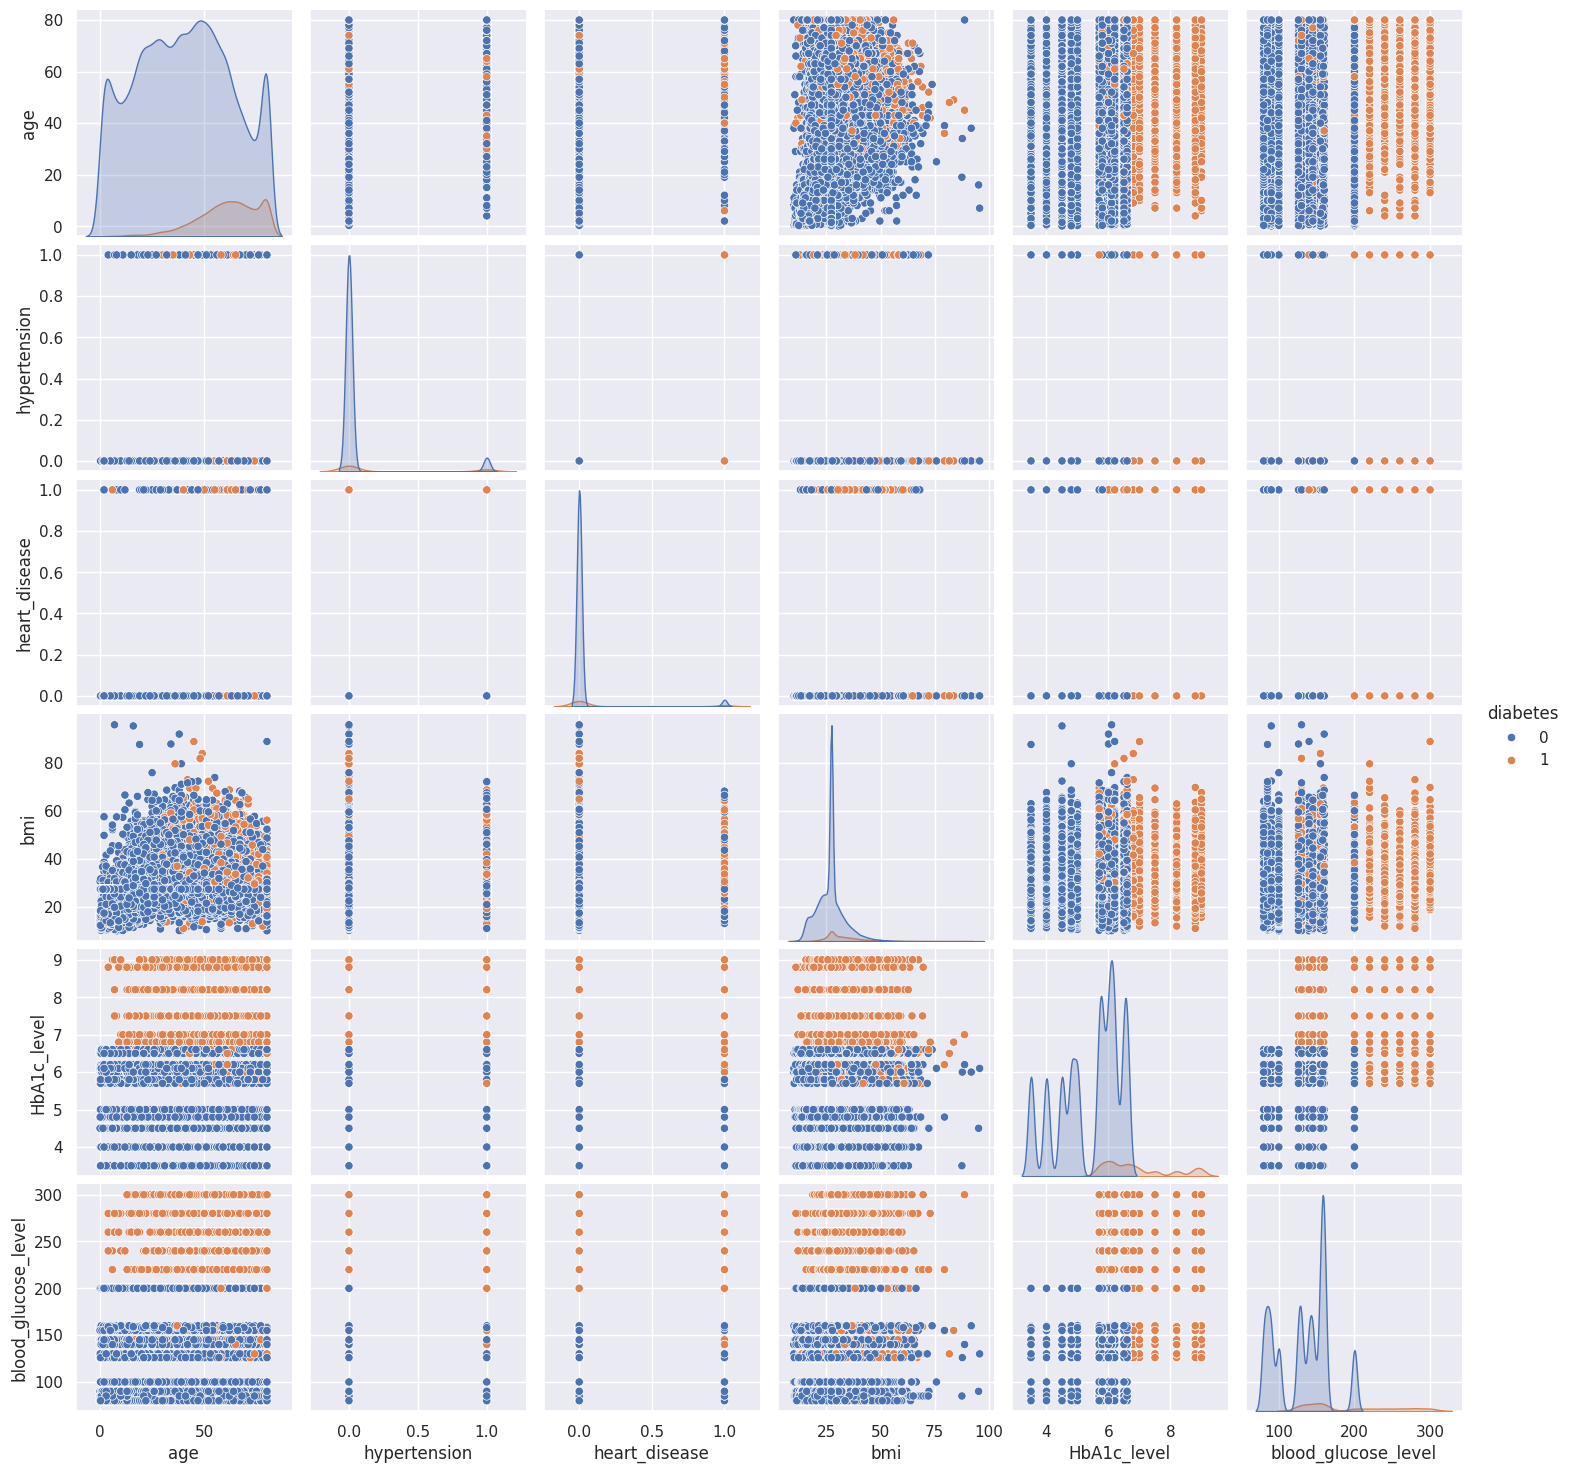

In [29]:
sns.pairplot(df, hue='diabetes')
plt.show()

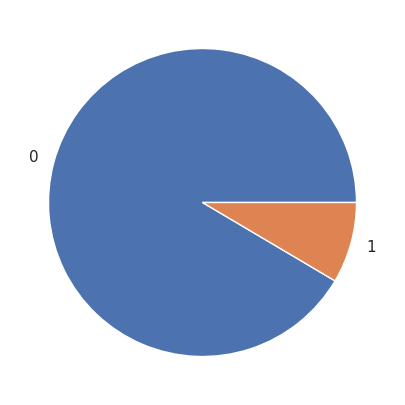

In [30]:
y =df['diabetes']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [31]:
X = df.drop(columns=['diabetes', 'gender', 'smoking_history'])
X.head(100)

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level
0   80.0             0              1  25.19          6.6                  140
1   54.0             0              0  27.32          6.6                   80
2   28.0             0              0  27.32          5.7                  158
3   36.0             0              0  23.45          5.0                  155
4   76.0             1              1  20.14          4.8                  155
..   ...           ...            ...    ...          ...                  ...
95  19.0             0              0  27.32          6.1                   80
96  67.0             0              0  27.32          6.2                  159
97  11.0             0              0  27.32          6.1                   90
98  30.0             0              0  50.13          6.0                  100
99  29.0             0              0  27.32          4.8                  158

[100 rows x 6 columns]

In [32]:
X.describe().transpose()

count        mean        std    min     25%     50%  \
age                  100000.0   41.885856  22.516840   0.08   24.00   43.00   
hypertension         100000.0    0.074850   0.263150   0.00    0.00    0.00   
heart_disease        100000.0    0.039420   0.194593   0.00    0.00    0.00   
bmi                  100000.0   27.320767   6.636783  10.01   23.63   27.32   
HbA1c_level          100000.0    5.527507   1.070672   3.50    4.80    5.80   
blood_glucose_level  100000.0  138.058060  40.708136  80.00  100.00  140.00   

                        75%     max  
age                   60.00   80.00  
hypertension           0.00    1.00  
heart_disease          0.00    1.00  
bmi                   29.58   95.69  
HbA1c_level            6.20    9.00  
blood_glucose_level  159.00  300.00

**Standardize the Data**

In [33]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.692704     -0.284439       4.936379 -0.321056     1.001706   
1  0.538006     -0.284439      -0.202578 -0.000116     1.001706   
2 -0.616691     -0.284439      -0.202578 -0.000116     0.161108   
3 -0.261399     -0.284439      -0.202578 -0.583232    -0.492690   
4  1.515058      3.515687       4.936379 -1.081970    -0.679490   
5 -0.971982     -0.284439      -0.202578 -0.000116     1.001706   
6  0.093892     -0.284439      -0.202578 -1.207032     0.908306   
7  1.648292     -0.284439      -0.202578 -0.521455     0.161108   
8  0.005069     -0.284439      -0.202578  0.952158    -0.679490   
9 -0.439045     -0.284439      -0.202578 -0.000116    -0.492690   

   blood_glucose_level  
0             0.047704  
1            -1.426210  
2             0.489878  
3             0.416183  
4             0.416183  
5            -1.303384  
6             1.521618  
7            -1.303384  
8             0.170530  
9            -0.934905

In [34]:
X.describe().transpose()

count          mean       std       min       25%  \
age                  100000.0  1.447553e-16  1.000005 -1.856658 -0.794336   
hypertension         100000.0  5.098144e-17  1.000005 -0.284439 -0.284439   
heart_disease        100000.0  3.367973e-17  1.000005 -0.202578 -0.202578   
bmi                  100000.0 -1.729816e-16  1.000005 -2.608320 -0.556111   
HbA1c_level          100000.0 -3.410605e-18  1.000005 -1.893686 -0.679490   
blood_glucose_level  100000.0 -2.786749e-16  1.000005 -1.426210 -0.934905   

                          50%       75%        max  
age                  0.049481  0.804475   1.692704  
hypertension        -0.284439 -0.284439   3.515687  
heart_disease       -0.202578 -0.202578   4.936379  
bmi                 -0.000116  0.340413  10.301613  
HbA1c_level          0.254508  0.628107   3.243300  
blood_glucose_level  0.047704  0.514444   3.978142

**Observations and variables**

In [35]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

<ipython-input-36-774acb9c9bc7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


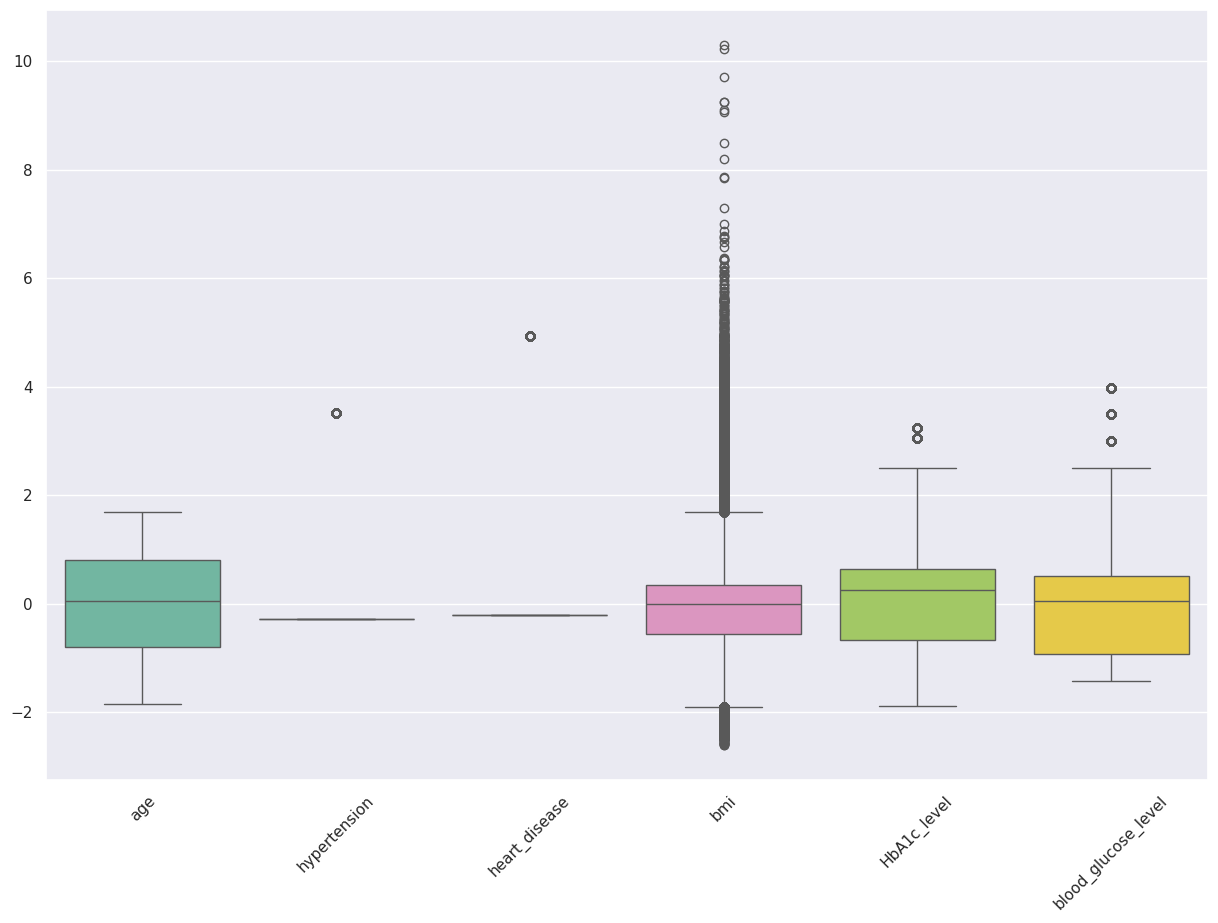

In [36]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-37-b50664f0e877>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


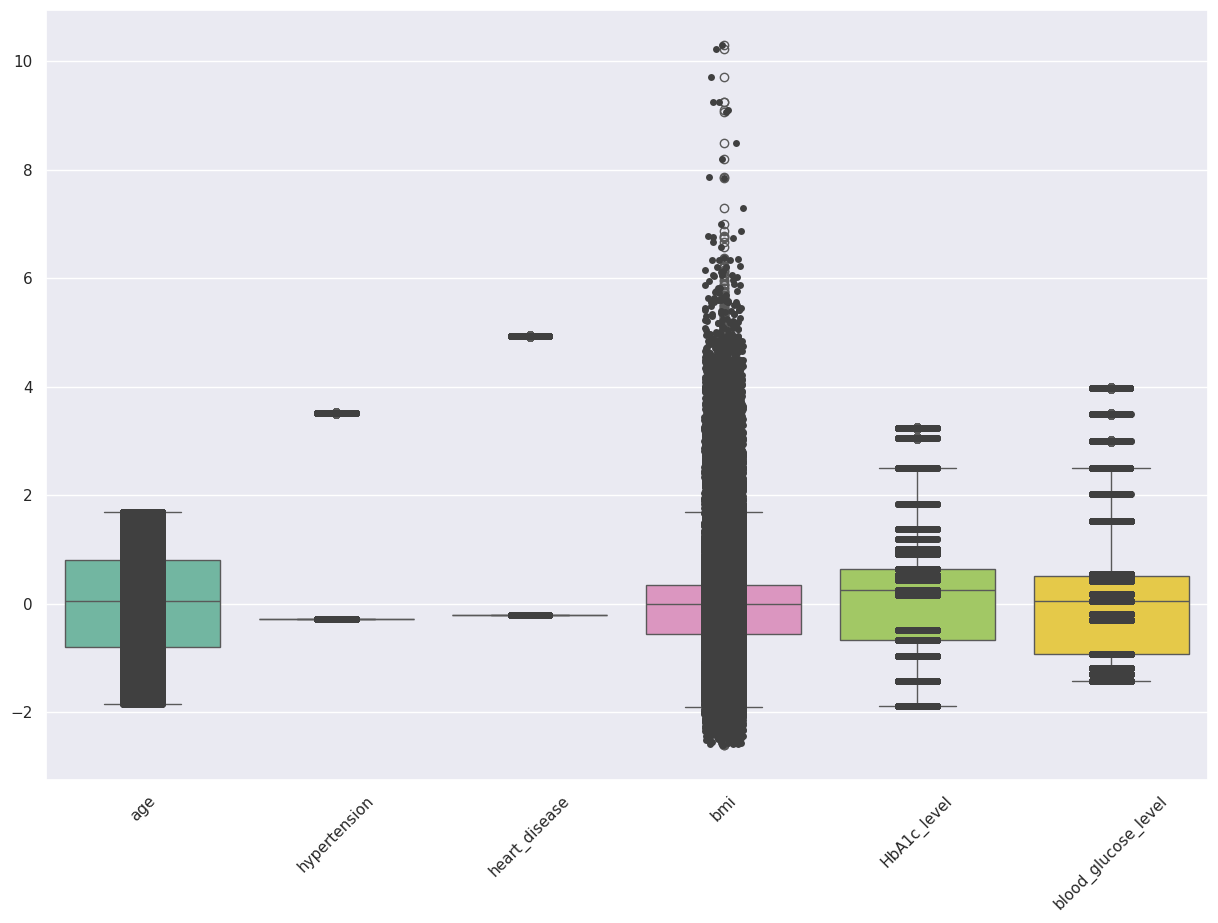

In [37]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

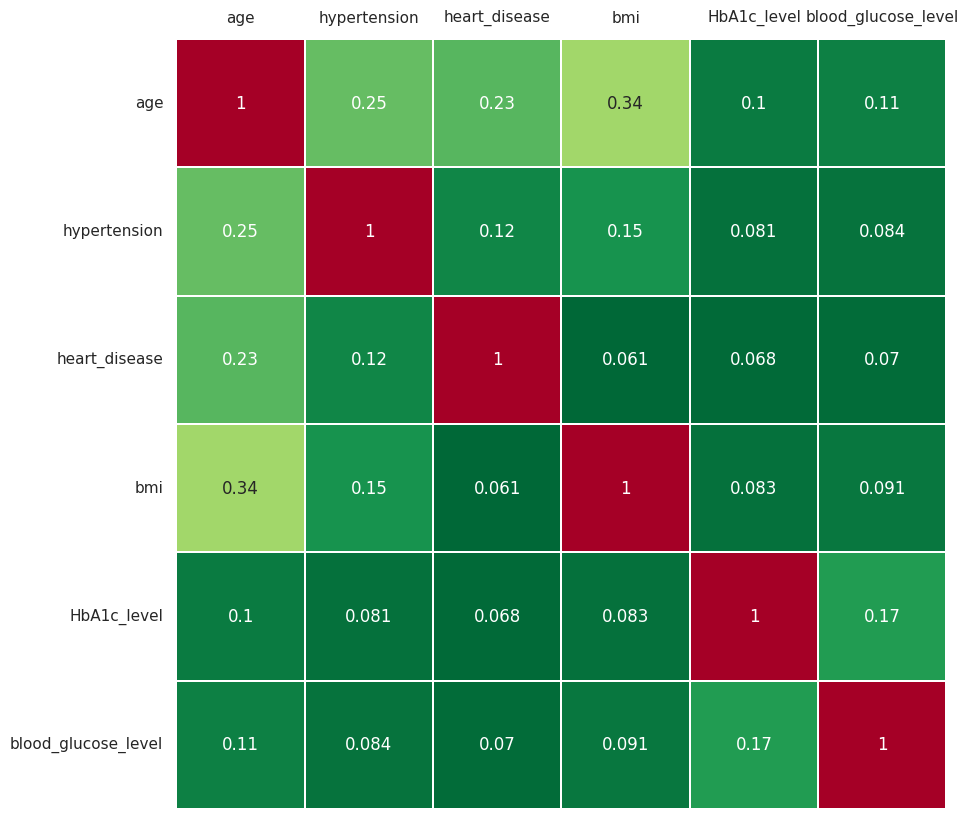

In [38]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

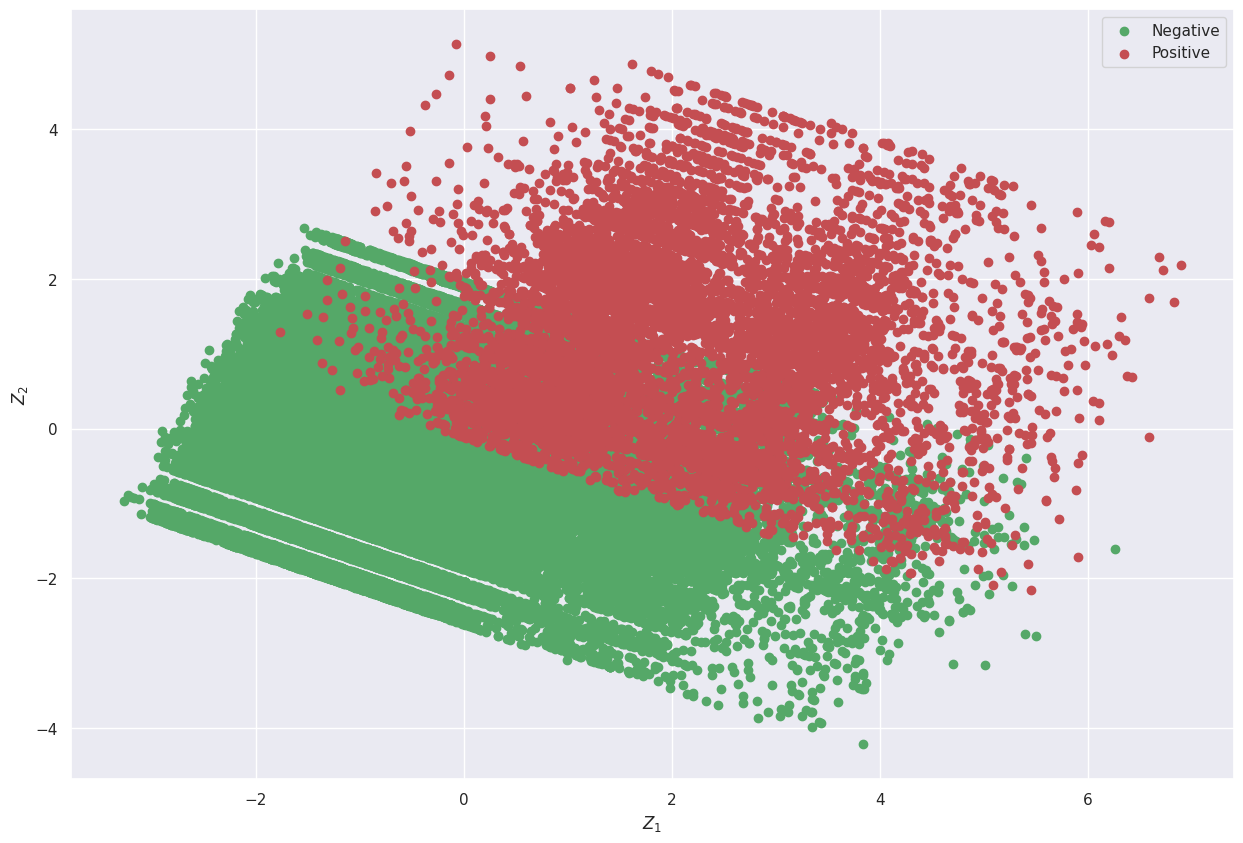

In [39]:
pca = PCA()
Z = pca.fit_transform(X)

# (Positive)->1,  (Negative)->0

idx_Negative= np.where(y == 0)
idx_Positive = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Negative,0], Z[idx_Negative,1], c='g', label='Negative')
plt.scatter(Z[idx_Positive,0], Z[idx_Positive,1], c='r', label='Positive')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 5.66264249e-01, -2.65467853e-01,  5.79501802e-02,
        -1.56845378e-01, -2.30034105e-02, -7.61829224e-01],
       [ 4.21369963e-01, -1.75894636e-01, -2.98405429e-02,
         8.64848802e-01,  7.64435073e-02,  1.91861704e-01],
       [ 3.52297132e-01, -1.43349498e-01, -8.18734803e-01,
        -2.96399935e-01, -1.89116992e-02,  3.11127627e-01],
       [ 4.56550248e-01, -2.18233522e-01,  5.69784483e-01,
        -3.60819072e-01, -5.62364925e-02,  5.34723011e-01],
       [ 2.84349245e-01,  6.56052922e-01, -6.59087110e-04,
         5.82740062e-02, -6.96617139e-01, -8.26665865e-03],
       [ 2.97298274e-01,  6.32461470e-01,  2.77461419e-02,
        -7.74396127e-02,  7.10515024e-01, -2.80789191e-03]])

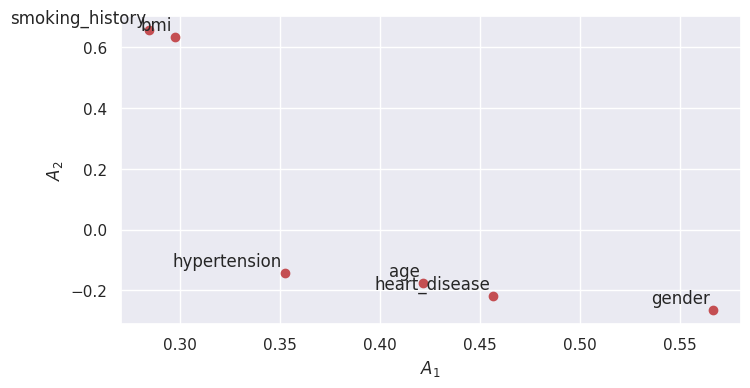

In [40]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


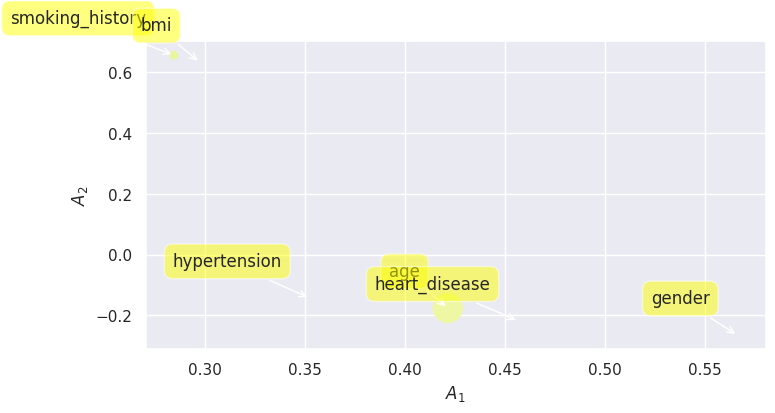

In [41]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([1.71312352, 1.0556581 , 0.94300259, 0.8491855 , 0.83294909,
       0.6061412 ])

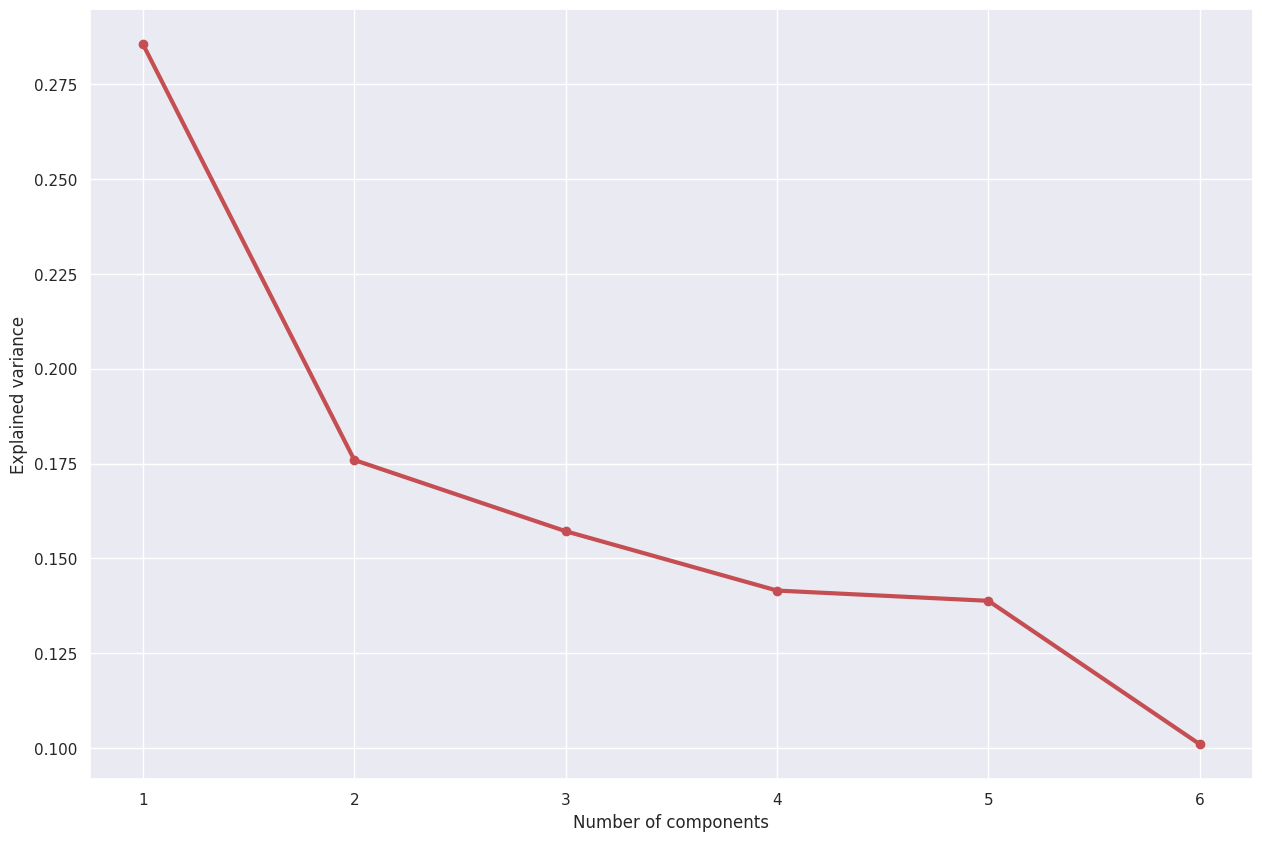

In [42]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

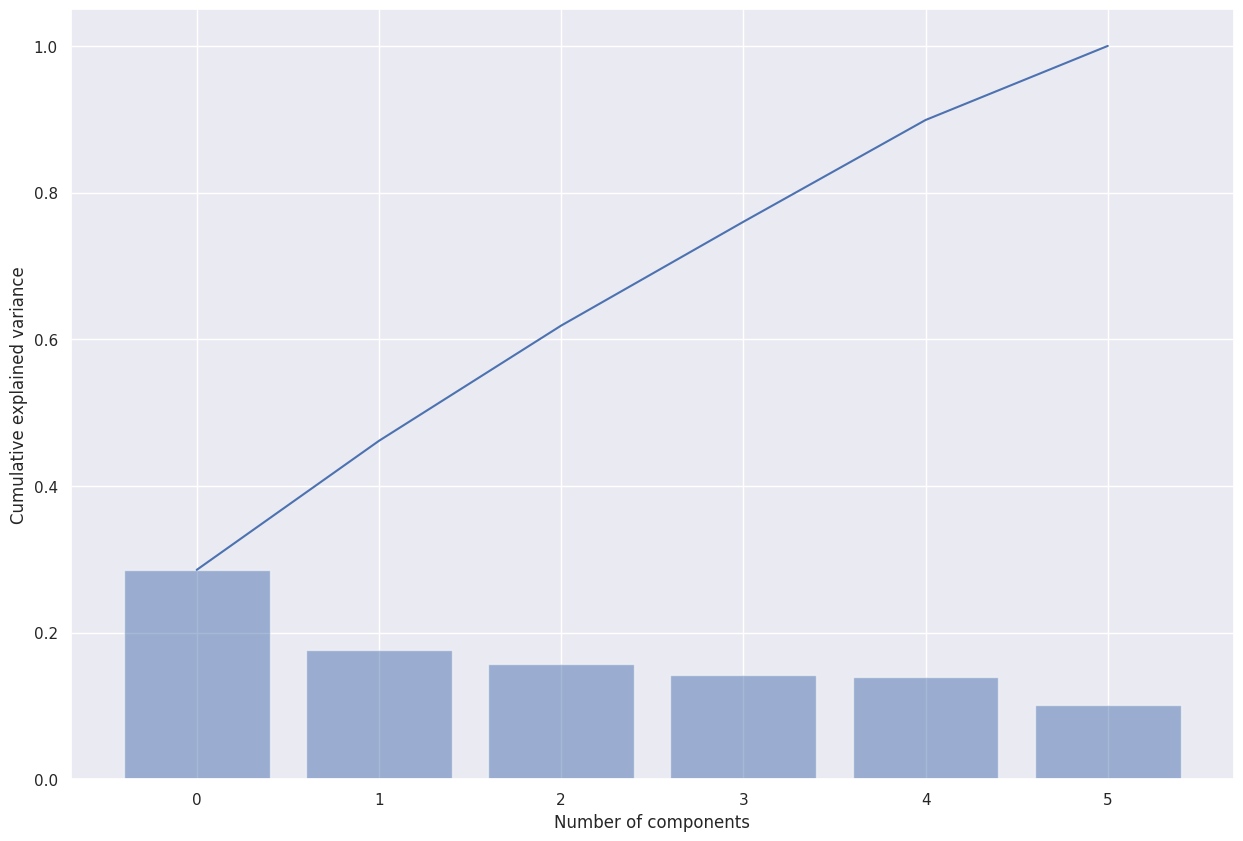

In [43]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.34954621, -0.30857831,  0.65833221, ...,  0.14693975,
       -1.50365633, -0.02778622])

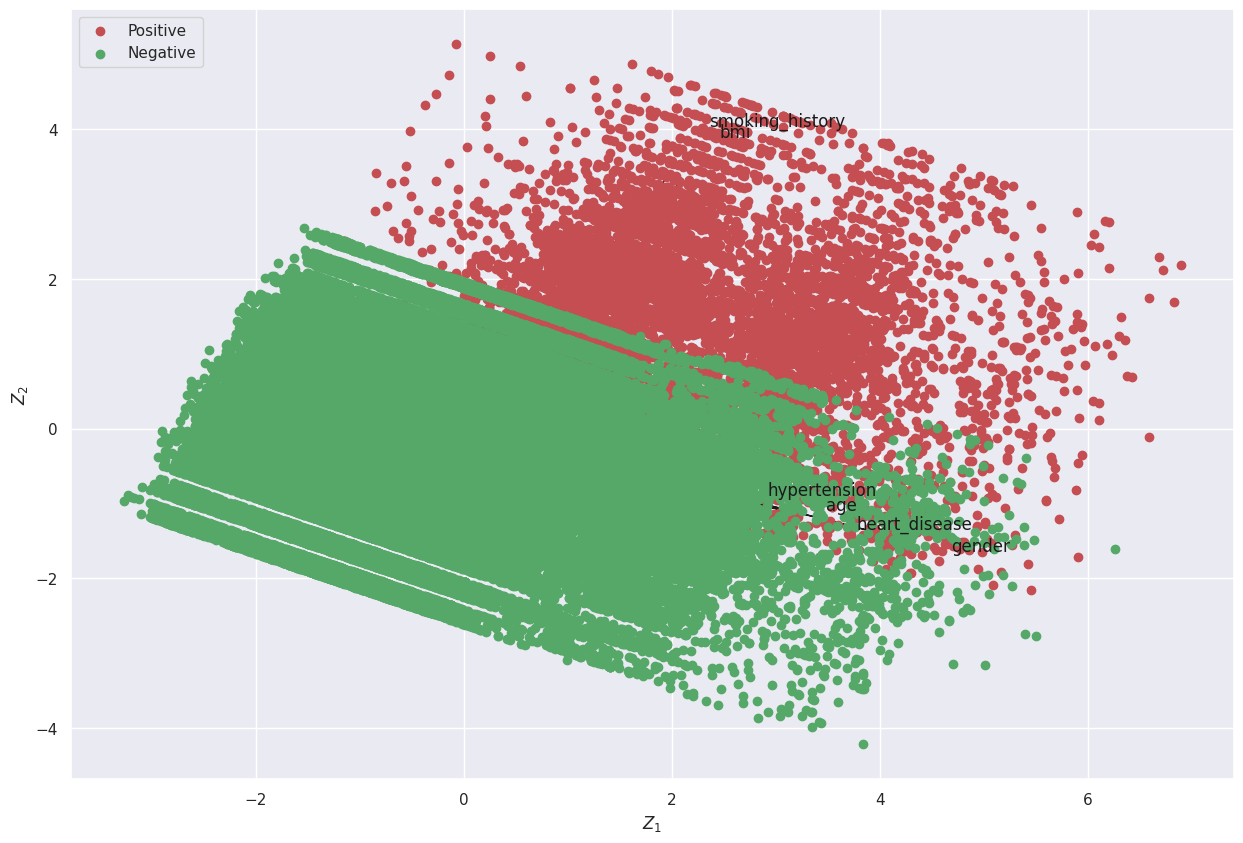

In [44]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Positive,0], Z[idx_Positive,1], c='r', label='Positive')
plt.scatter(Z[idx_Negative,0], Z[idx_Negative,1], c='g', label='Negative')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [45]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.6 MB/s eta 0:00:00


In [46]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [47]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0      2.730174 -0.349546 -4.117274 -1.804110 -0.799893  0.011629
1     -0.025796 -0.308578  0.165225 -0.101477 -1.741431 -0.531807
2     -0.349033  0.658332  0.152028 -0.117734  0.232115  0.349443
3     -0.621883  0.215733 -0.161247  0.004547  0.659820 -0.227422
4      3.514944 -1.674656 -4.663192  1.658335  0.970439  0.482048
...         ...       ...       ...       ...       ...       ...
99995  0.594867 -0.704848  0.239202 -0.323380 -1.333198 -1.409091
99996 -1.898491  0.881130 -0.809148  0.758202 -1.189852  0.425278
99997  0.619787  0.146940  0.291567 -0.404452  0.136611 -0.894948
99998 -0.767493 -1.503656  0.798656 -0.512435  0.261322  1.154522
99999 -0.213708 -0.027786 -0.240059  0.124457 -1.528521 -1.027986

[100000 rows x 6 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (28.5% expl.var)', ylabel='PC2 (17.5% expl.var)'>)

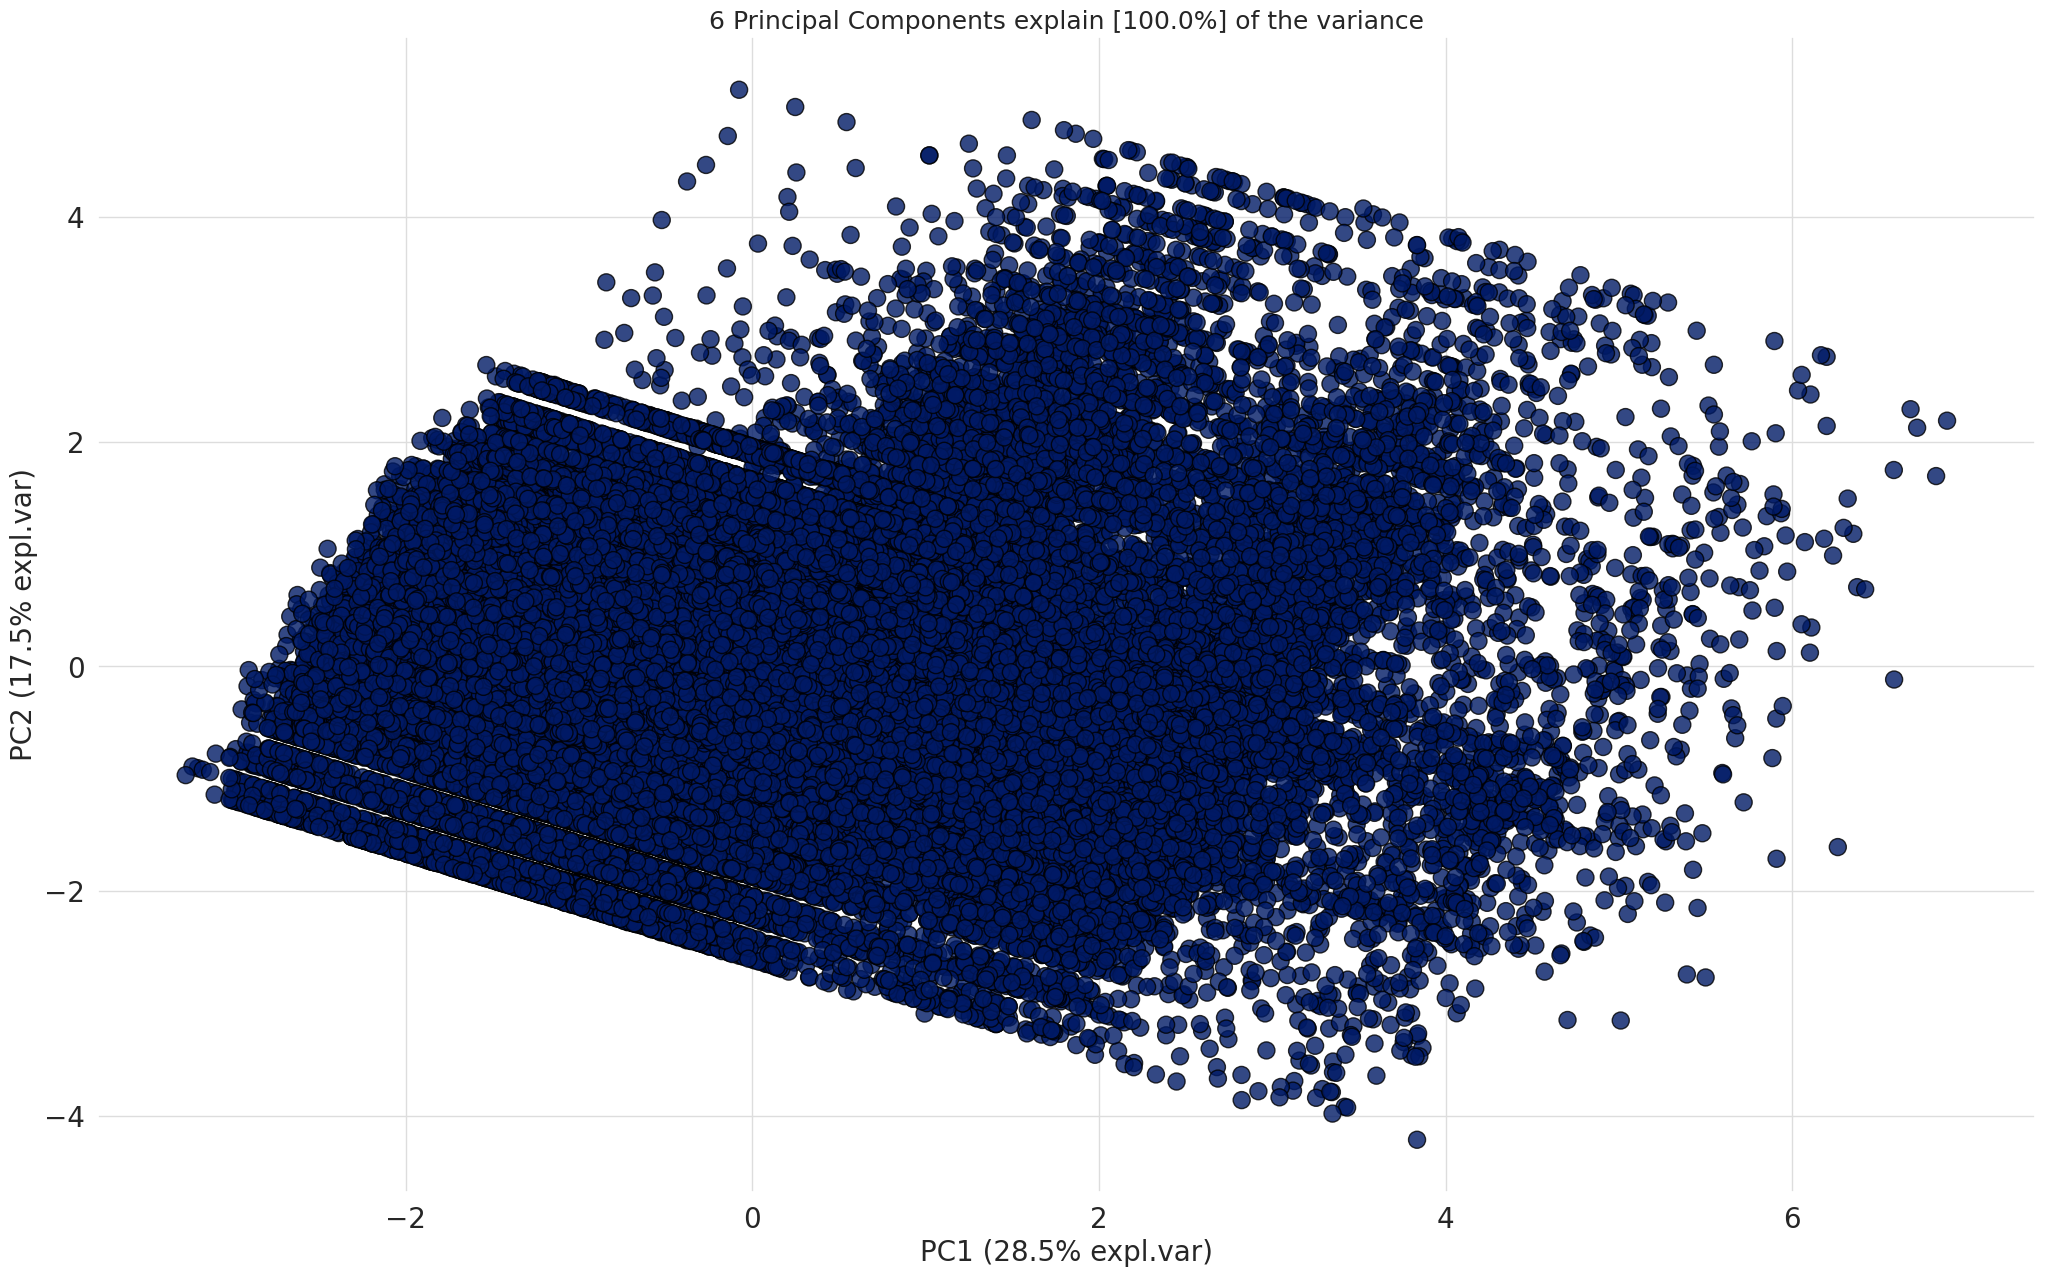

In [48]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [49]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5  \
age                  0.566264 -0.265468  0.057950 -0.156845 -0.023003   
hypertension         0.421370 -0.175895 -0.029841  0.864849  0.076444   
heart_disease        0.352297 -0.143349 -0.818735 -0.296400 -0.018912   
bmi                  0.456550 -0.218234  0.569784 -0.360819 -0.056236   
HbA1c_level          0.284349  0.656053 -0.000659  0.058274 -0.696617   
blood_glucose_level  0.297298  0.632461  0.027746 -0.077440  0.710515   

                          PC6  
age                 -0.761829  
hypertension         0.191862  
heart_disease        0.311128  
bmi                  0.534723  
HbA1c_level         -0.008267  
blood_glucose_level -0.002808

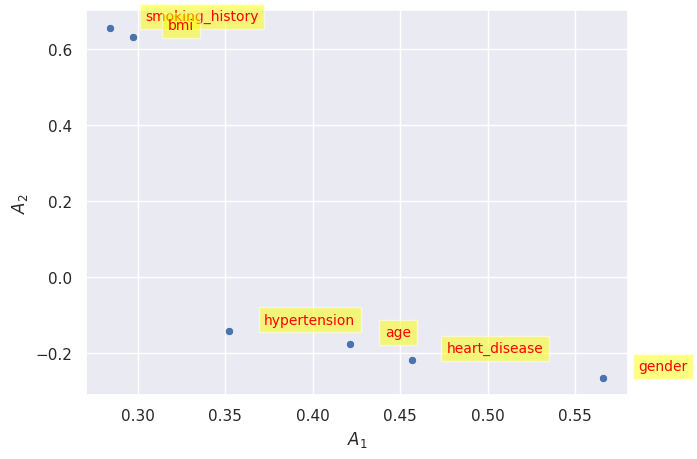

In [50]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

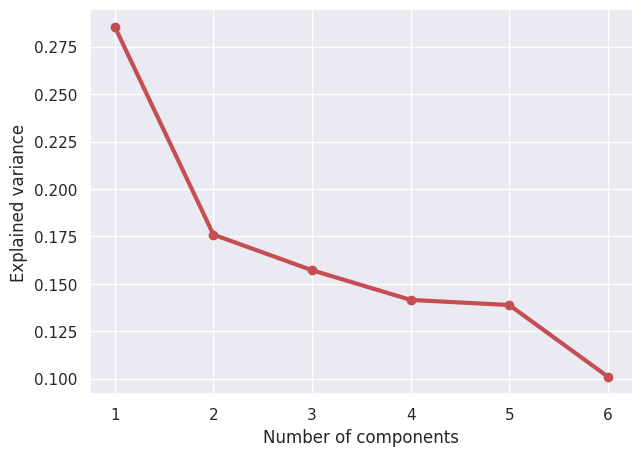

In [51]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

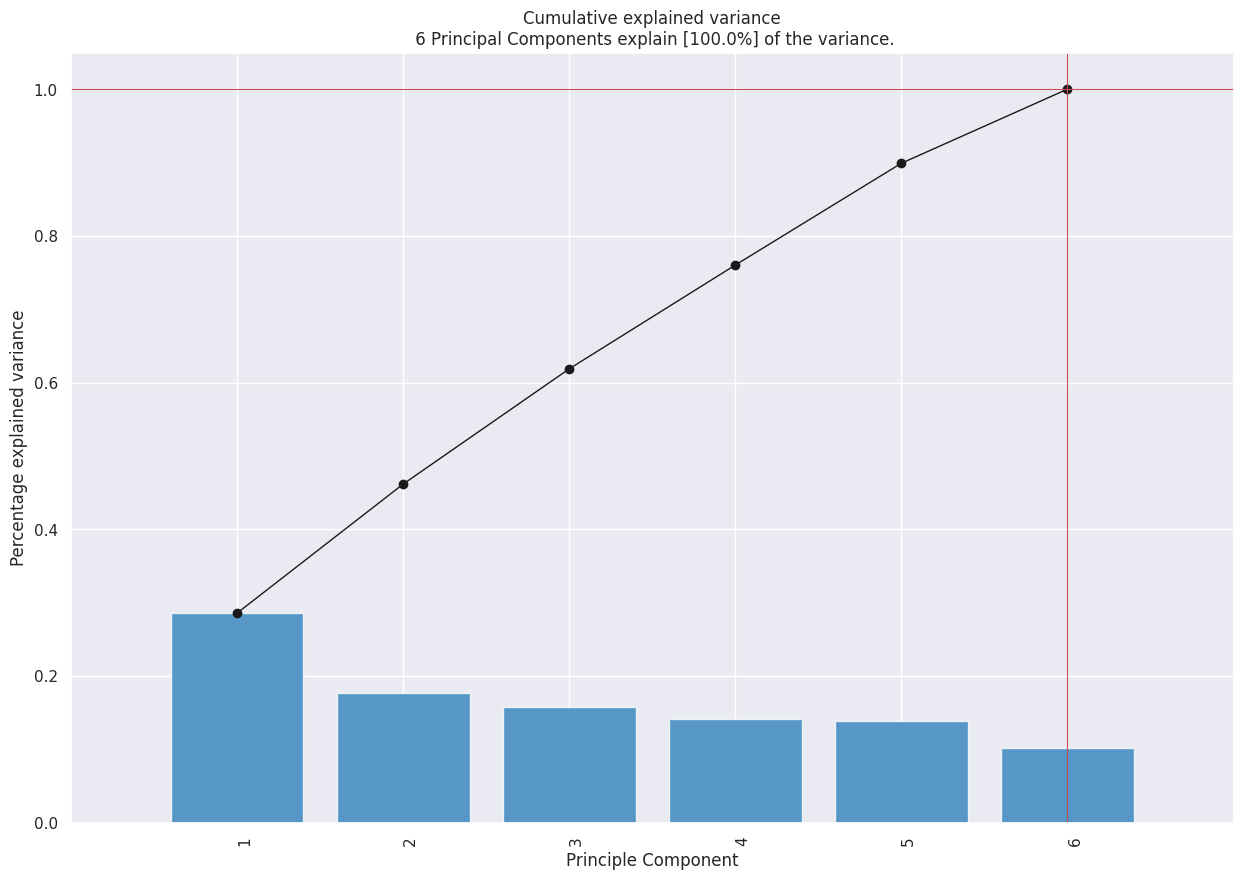

In [52]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (28.5% expl.var)', ylabel='PC2 (17.5% expl.var)'>)

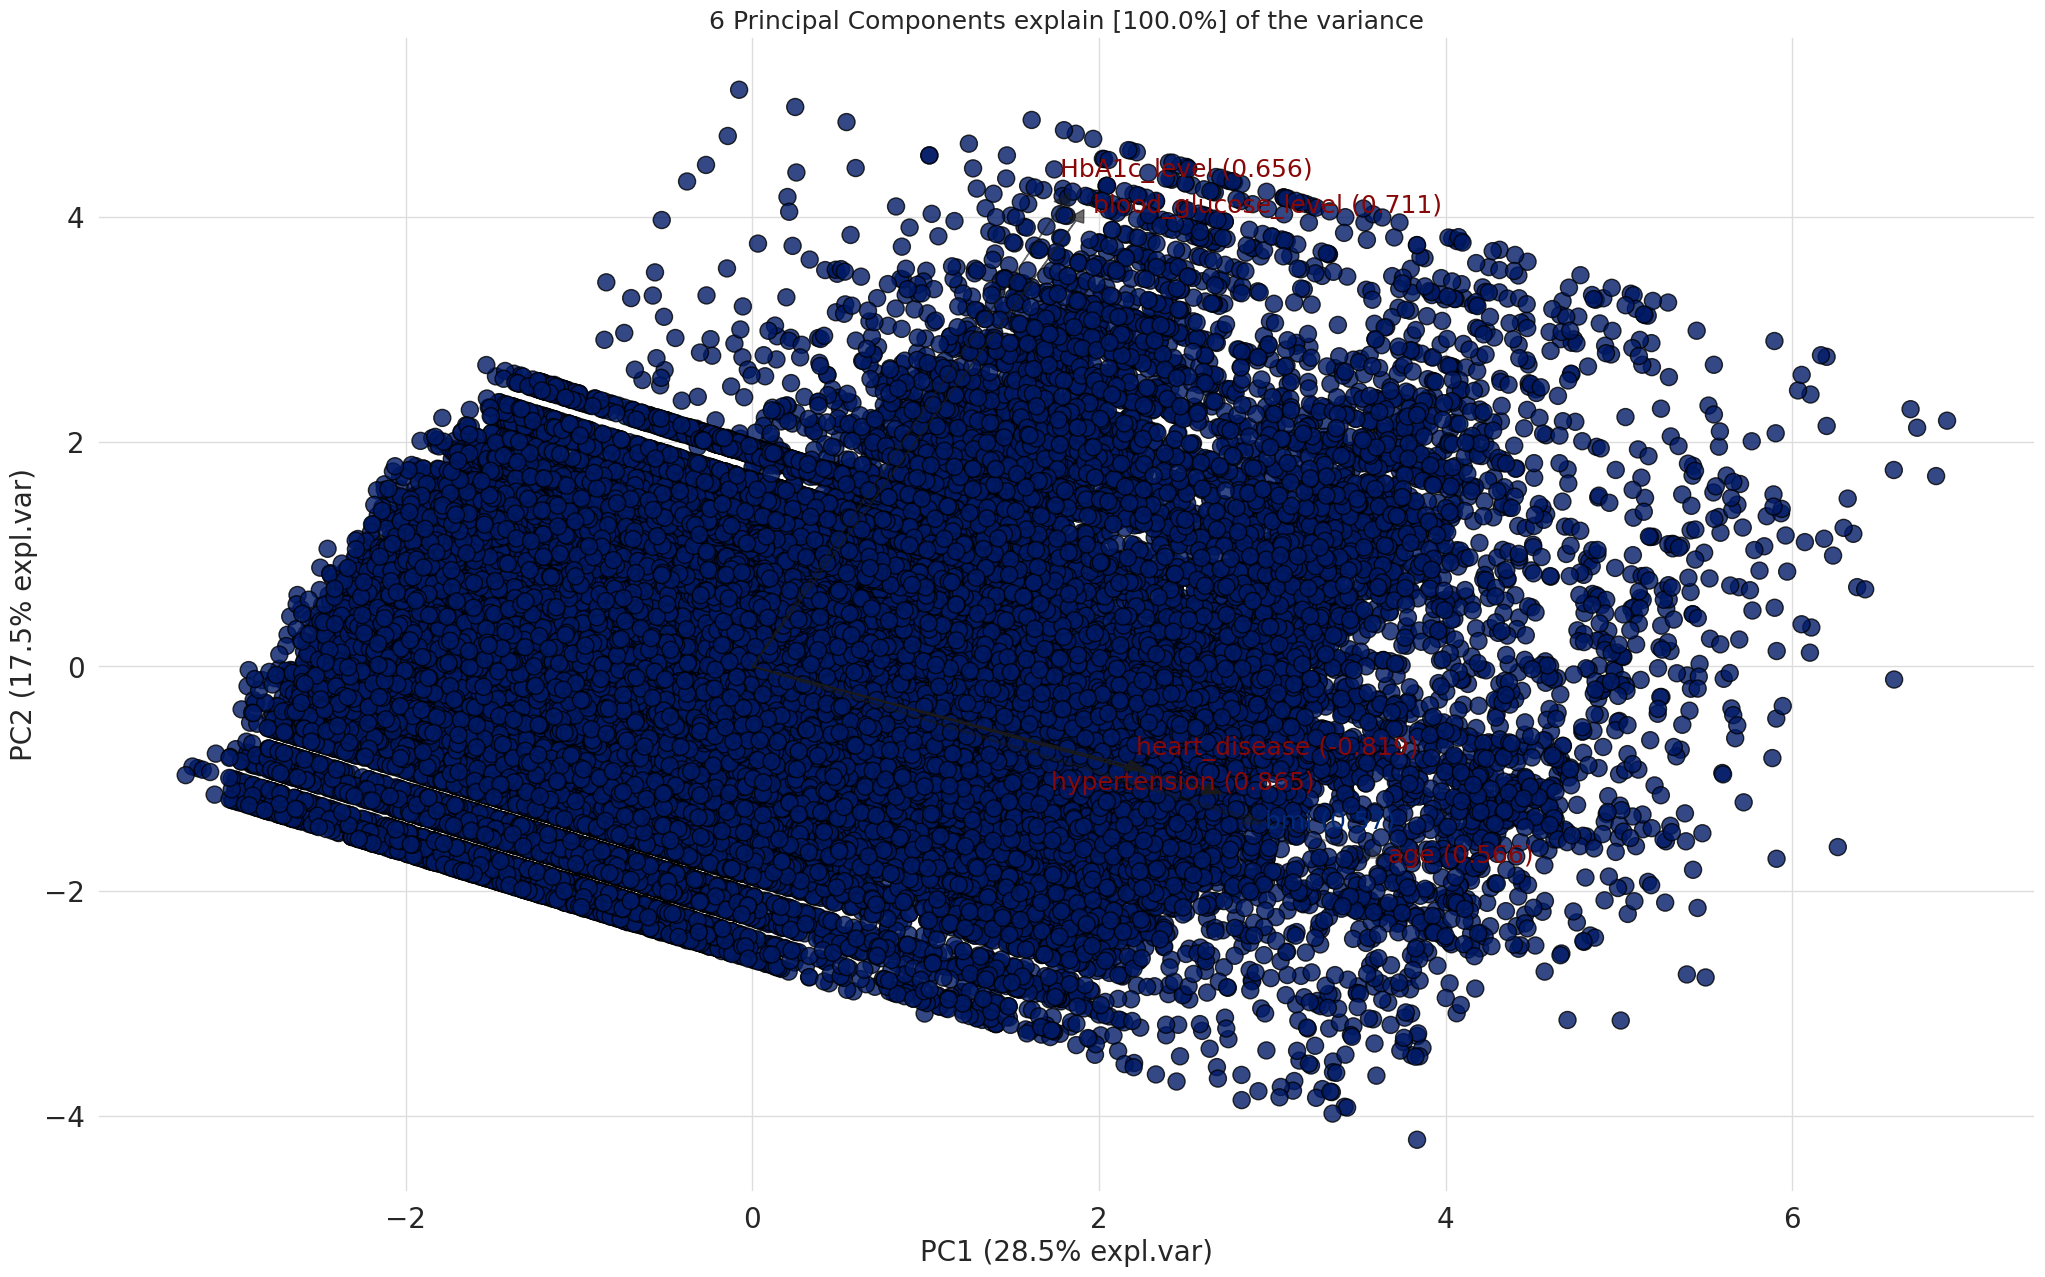

In [53]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (28.5% expl.var)', ylabel='PC2 (17.5% expl.var)', zlabel='PC3 (15.7% expl.var)'>)

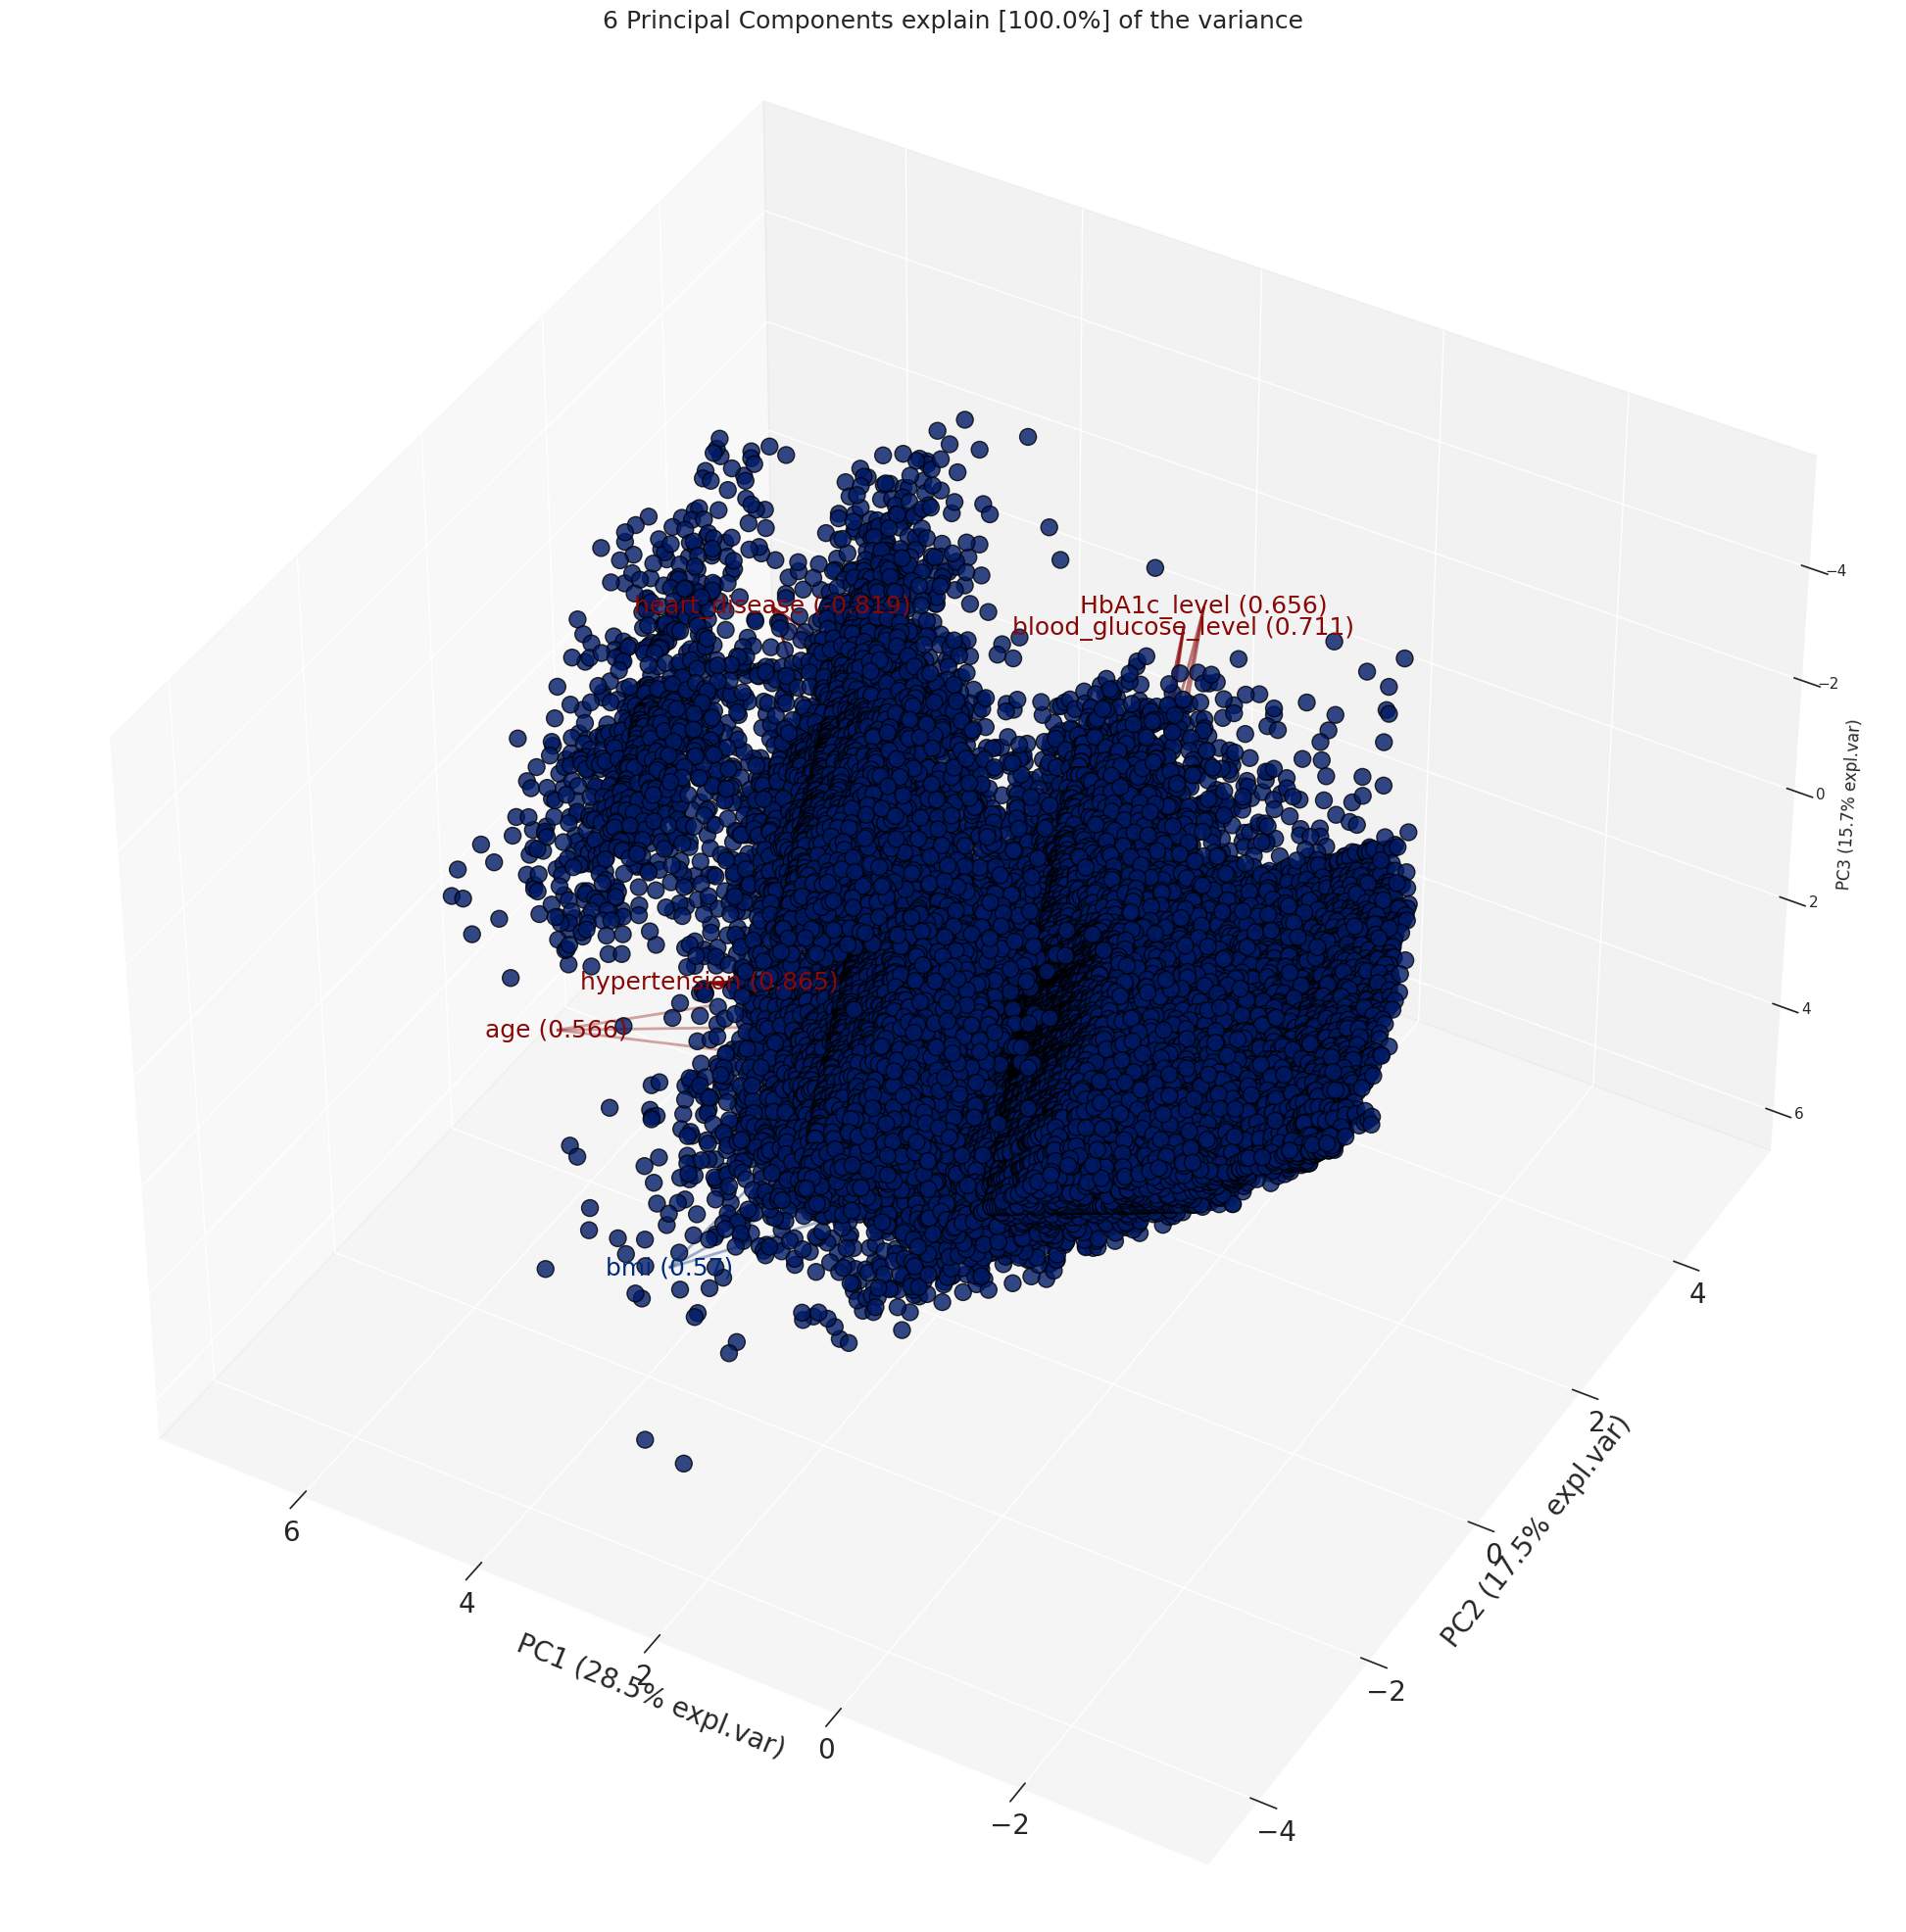

In [54]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [55]:
#Run the below code in your notebook to check the installed version
!pip install pycaret

from pycaret.utils import version
version()

'3.3.2'

In [59]:
#For Google Colab only
!pip show pycaret

from pycaret import *
#enable_colab()

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [60]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90000, 9)
Unseen Data For Predictions: (10000, 9)


In [61]:
from pycaret.classification import *
clf = setup(data=data, target='diabetes', train_size=0.7, session_id=123)

**Comparing All Models**

In [62]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

 Create a Model

**Ada Boost Classifier**

In [64]:
ada = create_model('ada')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [65]:
tuned_ada=tune_model(ada)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [66]:
tuned_ada

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Evaluate Logistic Regression**


In [67]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Random Forest Classifier**

In [68]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [70]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [71]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Logistic Regression**

In [72]:
lr=create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune LR Model**

In [73]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate LR Model**

In [74]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [77]:
clf_pca = setup(data=data, target='diabetes', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [78]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [79]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Tune Best Model**

In [80]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Best Model**

In [81]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [83]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [84]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Random Forest Model**

In [86]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [87]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [88]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# **Evaluate Model RF**

In [89]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [90]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [91]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [92]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [93]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [3]:
et_pca = create_model('et')

NameError: name 'create_model' is not defined

In [ ]:
tuned_et_pca = tune_model(et_pca)

In [ ]:
tuned_et_pca

In [ ]:
evaluate_model(tuned_et_pca)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
!pip install shap

import shap

!pip install pycaret[analysis]

interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')

In [4]:
# Install the shap module
!pip install shap

# Import the shap module
import shap

# Call the interpret_model function again
interpret_model(tuned_et_pca, plot='summary')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00


NameError: name 'interpret_model' is not defined